In [ ]:
import os
import cv2
import zipfile
from tqdm import tqdm
from io import BytesIO
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CK+48.zip to CK+48.zip


In [ ]:
zip_path = next(iter(uploaded))
with zipfile.ZipFile(BytesIO(uploaded[zip_path]), 'r') as zip_ref:
    zip_ref.extractall("/content/CK+48")
extracted_path = "/content/CK+48/CK+48"
os.listdir(extracted_path)
DATADIR = extracted_path
CATEGORIES = os.listdir(DATADIR)

In [ ]:

def load_data():
    data = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), 0)
            data.append([img_array, class_num])

    return data

In [ ]:
data = load_data()
len(data)

100%|██████████| 54/54 [00:00<00:00, 7060.46it/s]


981

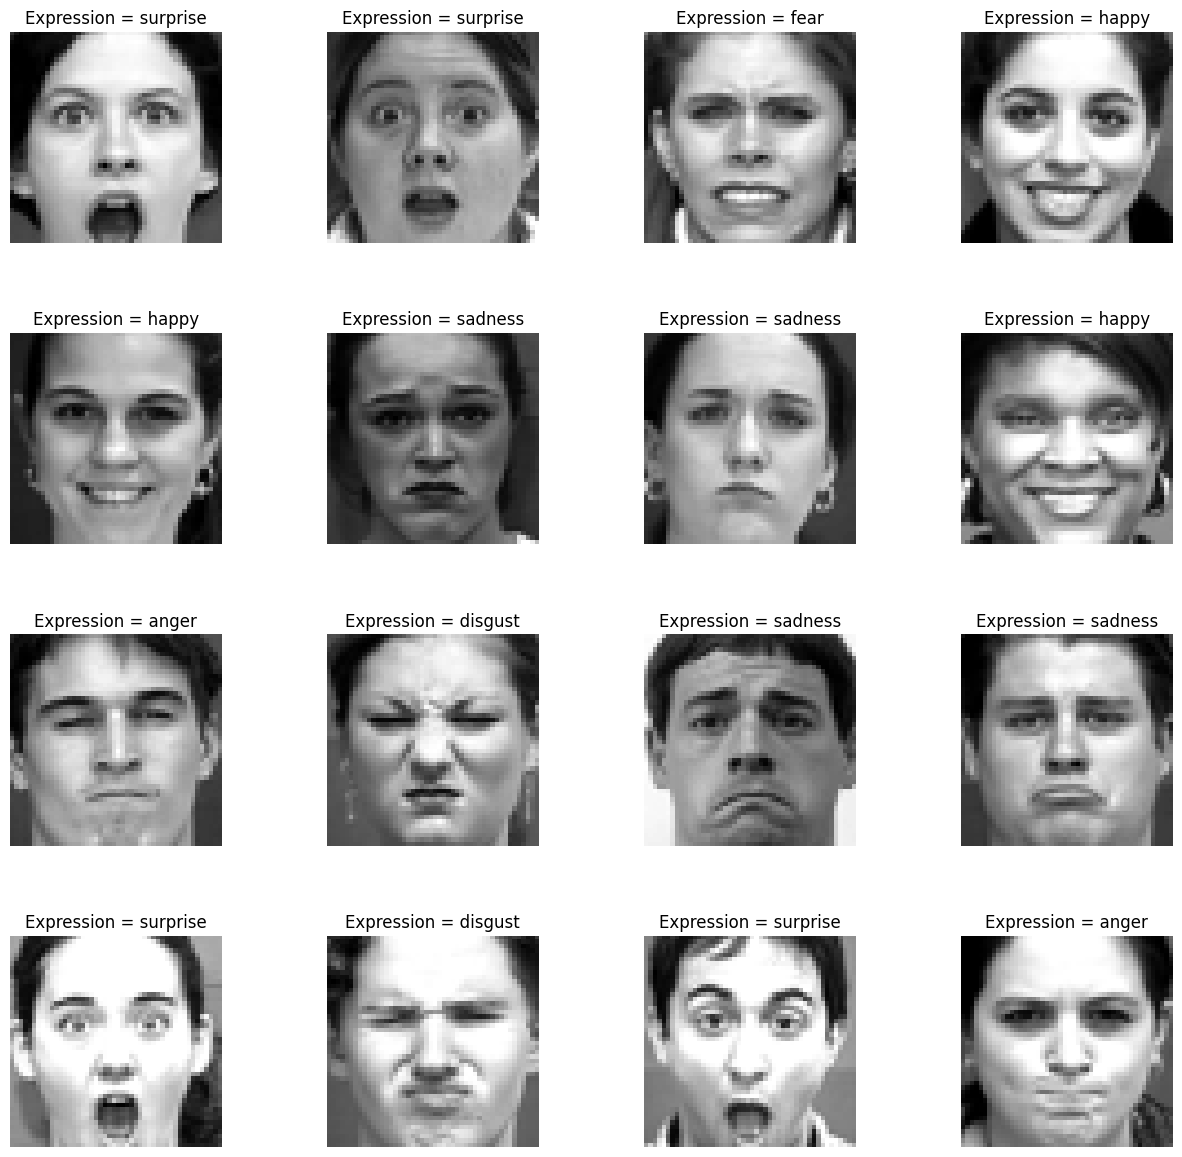

In [ ]:
#the images in our dataset
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in range(0, L * W):
    sample = random.choice(data)
    axes[i].set_title("Expression = "+str(CATEGORIES[sample[1]]))
    axes[i].imshow(sample[0], cmap='gray')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

Splitting dataset to training and testing **dataset**

In [ ]:
X = np.array([ x[0] for x in data])
y = np.array([Y[1] for Y in data])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [ ]:
print("X_train shape: ", X_train.shape)#images are 48x48 pixels
print("y_train shape: ", y_train.shape)
print("-------------------------------")
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (784, 48, 48)
y_train shape:  (784,)
-------------------------------
X_test shape:  (197, 48, 48)
y_test shape:  (197,)


In [ ]:
# reshaping y_train and y_test
y_train = np.reshape(y_train, (len(y_train),1))
y_test  = np.reshape(y_test , (len(y_test ),1))

print("After reshaping")
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

After reshaping
y_train shape:  (784, 1)
y_test shape:  (197, 1)


In [ ]:
X_train_Gabor  = X_train
X_test_Gabor = X_test

In [ ]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print("After adding color channel")
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

After adding color channel
X_train shape:  (784, 48, 48, 1)
X_test shape:  (197, 48, 48, 1)


In [ ]:
#normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train[0]

array([6])

In [ ]:
y_train_SVM = y_train
y_test_SVM = y_test

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_train.shape, y_test.shape

((784, 7), (197, 7))

In [ ]:
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

<ipython-input-23-7728609ad122>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(


(-0.5, 47.5, 47.5, -0.5)

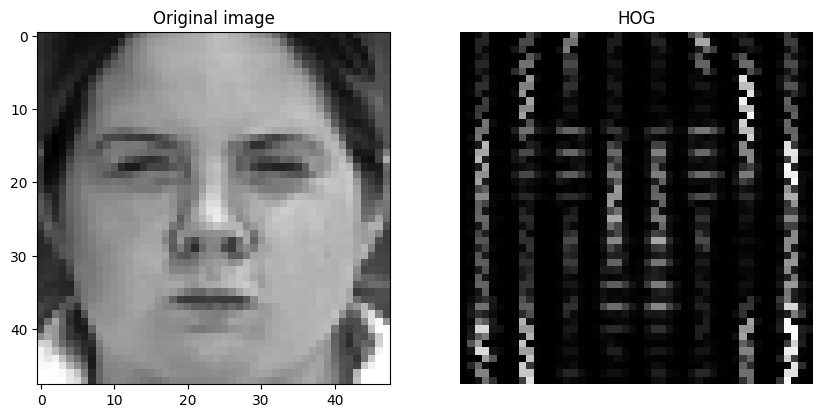

In [ ]:
plt.figure(figsize=(10, 10))


plt.subplot(1,2,1)
img = random.choice(X_train)
# first image needs to be resized before passing it to HOG descriptor
resized_img =  resize(img, (128, 64))
plt.title("Original image")
plt.imshow(img, cmap='gray')
fd, hog_image = hog(
    resized_img,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    visualize=True,
    multichannel=True
)
plt.subplot(1,2,2)
plt.title("HOG")
plt.imshow(resize(hog_image, (48, 48)), cmap='gray')
plt.axis('off')

In [ ]:
def Create_Hog_features(data):
    Feature_data = np.zeros((len(data),48,48))

    for i in range(len(data)):
        img = data[i]
        resized_img = resize(img, (128, 64))
        fd, hog_image = hog(
            resized_img,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=True,
            multichannel=True
        )
        Feature_data[i] = resize(hog_image, (48, 48))




    return Feature_data


        # Plot the histogram of the HOG features
 plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image")

        plt.subplot(1, 3, 2)
        plt.imshow(resize(hog_image, (48, 48)), cmap='gray')
        plt.title("HOG Image")

        plt.subplot(1, 3, 3)
        hog_hist, hog_bins = exposure.histogram(fd)
        plt.plot(hog_bins, hog_hist)
        plt.title("HOG Histogram")

        plt.show()'''

In [ ]:
Feature_X_train = Create_Hog_features(X_train)
Feature_X_train.shape

<ipython-input-30-6ff6ccf2a6db>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(


(784, 48, 48)

(-0.5, 47.5, 47.5, -0.5)

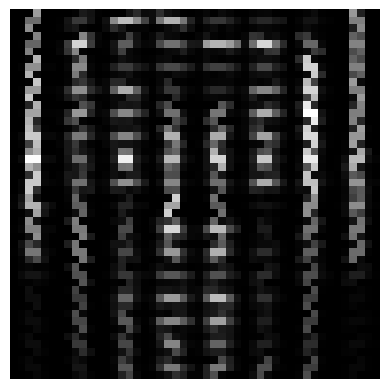

In [ ]:
plt.imshow(random.choice(Feature_X_train), cmap='gray')
plt.axis('off')

In [ ]:
# doing same for test data
Feature_X_test = Create_Hog_features(X_test)

Feature_X_test.shape

<ipython-input-30-6ff6ccf2a6db>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(


(197, 48, 48)

(-0.5, 47.5, 47.5, -0.5)

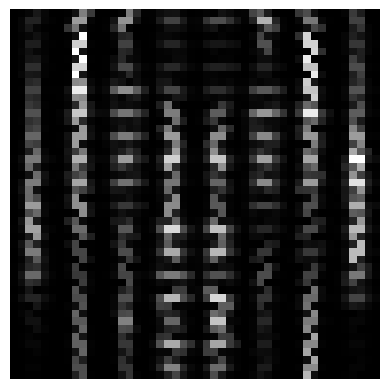

In [ ]:
plt.imshow(random.choice(Feature_X_test), cmap='gray')
plt.axis('off')

In [ ]:
# Again adding color channel as it got removed while converting img to hog img
X_train_HOG = np.expand_dims(Feature_X_train, axis=3)
X_test_HOG = np.expand_dims(Feature_X_test, axis=3)

print("After adding color channel")
print("X_train_HOG shape: ", X_train_HOG.shape)
print("X_test_HOG shape: ", X_test_HOG.shape)

After adding color channel
X_train_HOG shape:  (784, 48, 48, 1)
X_test_HOG shape:  (197, 48, 48, 1)


In [ ]:
print("X_train_HOG shape: ", X_train_HOG.shape)
print("y_train shape: ", y_train.shape)
print("X_test_HOG shape: ", X_test_HOG.shape)
print("y_test shape: ", y_test.shape)


X_train_HOG shape:  (784, 48, 48, 1)
y_train shape:  (784, 7)
X_test_HOG shape:  (197, 48, 48, 1)
y_test shape:  (197, 7)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

TESTING HOG-CNN

In [ ]:
def create_model(input_shape=None):
    if input_shape is None :
        input_shape=(48,48,1)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))

    return model

In [ ]:
es = EarlyStopping(
    monitor='val_accuracy', min_delta=0.0001, patience=10, verbose=2,
    mode='max', baseline=None, restore_best_weights=True
)
lr = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=2,
    mode='max', min_delta=1e-5, cooldown=0, min_lr=0
)

callbacks = [es, lr]

In [ ]:
HOG_model = create_model()

In [ ]:
HOG_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        9280      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0

In [ ]:
HOG_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam' )

In [ ]:
HOG_history = HOG_model.fit(X_train_HOG, y_train, batch_size=8 , epochs=50, validation_data = (X_test_HOG, y_test), callbacks = [callbacks])

Epoch 1/50
98/98 [==============================] - 4s 27ms/step - loss: 1.8529 - accuracy: 0.2372 - val_loss: 1.7849 - val_accuracy: 0.2437 - lr: 0.0010
Epoch 2/50
98/98 [==============================] - 4s 38ms/step - loss: 1.7623 - accuracy: 0.2781 - val_loss: 1.6470 - val_accuracy: 0.3959 - lr: 0.0010
Epoch 3/50
98/98 [==============================] - 2s 25ms/step - loss: 1.5481 - accuracy: 0.4311 - val_loss: 1.3368 - val_accuracy: 0.5076 - lr: 0.0010
Epoch 4/50
98/98 [==============================] - 2s 22ms/step - loss: 1.3320 - accuracy: 0.5140 - val_loss: 1.2820 - val_accuracy: 0.5381 - lr: 0.0010
Epoch 5/50
98/98 [==============================] - 2s 22ms/step - loss: 1.1161 - accuracy: 0.5816 - val_loss: 0.9236 - val_accuracy: 0.6599 - lr: 0.0010
Epoch 6/50
98/98 [==============================] - 2s 22ms/step - loss: 0.9450 - accuracy: 0.6467 - val_loss: 0.8174 - val_accuracy: 0.7259 - lr: 0.0010
Epoch 7/50
98/98 [==============================] - 3s 26ms/step - loss: 0.8

In [ ]:
y_pred = np.argmax(HOG_model.predict(X_test_HOG), axis=1)
y_test_labels = np.argmax(y_test, axis=1)
# Print classification report
classification_rep = classification_report(y_test_labels, y_pred)
print("Classification Report:\n", classification_rep)

7/7 [==============================] - 0s 17ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       0.96      1.00      0.98        43
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        16
           4       1.00      0.89      0.94        18
           5       1.00      0.96      0.98        48
           6       1.00      0.90      0.95        10

    accuracy                           0.97       197
   macro avg       0.98      0.96      0.97       197
weighted avg       0.98      0.97      0.97       197



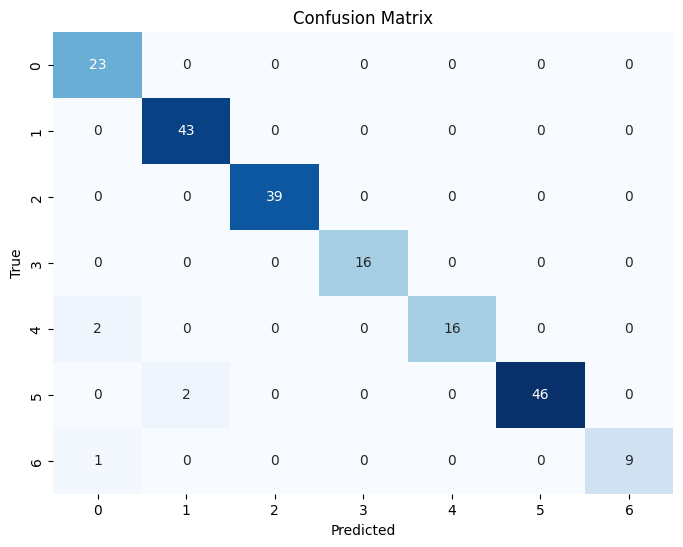

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test_labels), yticklabels=np.unique(y_test_labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def plot_performance(history):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')

    plt.legend()
    plt.grid()
    plt.title('train and val loss evolution')

    plt.subplot(2, 1, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')

    plt.legend()
    plt.grid()
    plt.title('train and val accuracy')

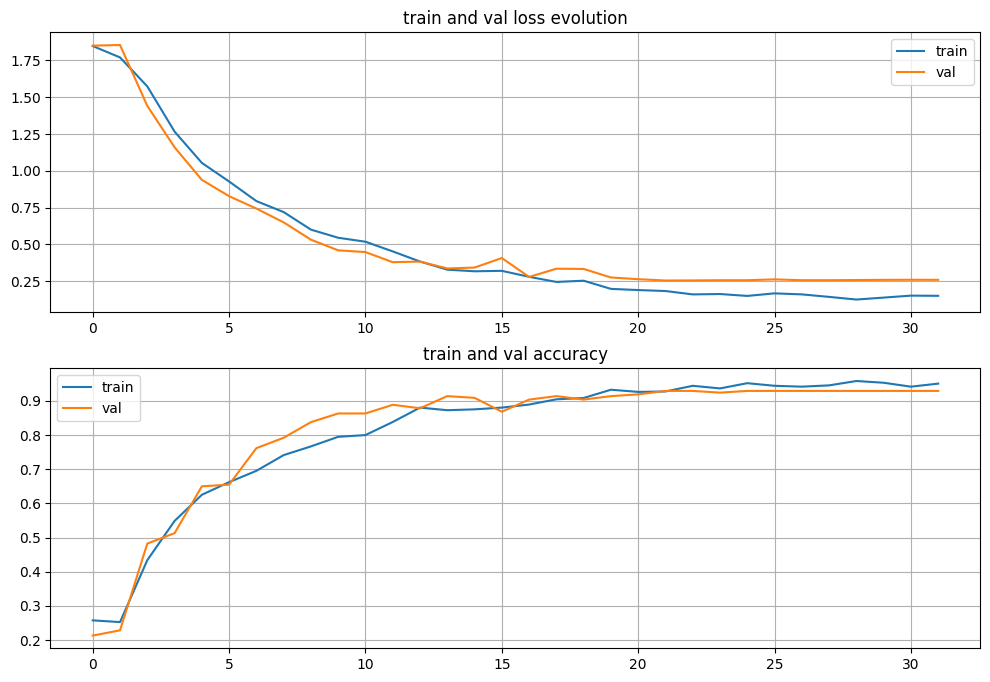

In [ ]:
plot_performance(HOG_history)

In [ ]:
acc = []
HOG_acc = HOG_model.evaluate(X_test_HOG, y_test, verbose = 0)[1]
acc.append(HOG_acc)
print("HOG Accuracy :",HOG_model.evaluate(X_test_HOG, y_test, verbose = 0)[1])

HOG Accuracy : 0.9289340376853943


In [ ]:
HOG_model.save('HOG_model.keras')